In [1]:
import os 
import shutil, glob
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 

In [2]:
places_dir = '/data/ddmg/slabs/data_large'
# target_places = [
#     ['bamboo_forest', 'forest/broadleaf'],  # Land backgrounds
#     ['ocean', 'lake/natural']]              # Water backgrounds

# if not os.path.exists('/data/ddmg/slabs/places'):
#     os.mkdir('/data/ddmg/slabs/places')

# # --- get water places
# if not os.path.exists('/data/ddmg/slabs/places/water'):
#     os.mkdir('/data/ddmg/slabs/places/water')

# water_id = 0 
# water_places = ['o/ocean', 'l/lake/natural']
# for place in water_places: 
#     place_files = glob.glob(f'/data/ddmg/slabs/data_large/{place}/*.jpg')
#     for place_file in place_files: 
#         shutil.copy(place_file, f'/data/ddmg/slabs/places/water/image_{water_id}.jpg')
#         water_id =  water_id + 1

# # --- get land places 
# if not os.path.exists('/data/ddmg/slabs/places/land'):
#     os.mkdir('/data/ddmg/slabs/places/land')

# land_id = 0 
# land_places = ['b/bamboo_forest', 'f/forest/broadleaf']
# for place in land_places: 
#     place_files = glob.glob(f'/data/ddmg/slabs/data_large/{place}/*.jpg')
#     for place_file in place_files: 
#         shutil.copy(place_file, f'/data/ddmg/slabs/places/land/image_{land_id}.jpg')
#         land_id = land_id + 1
                    


In [3]:
cub_dir = '/data/ddmg/slabs/CUB_200_2011'
images_path = os.path.join(cub_dir, 'images.txt')

water_birds_list = [
    'Albatross', # Seabirds
    'Auklet',
    'Cormorant',
    'Frigatebird',
    'Fulmar',
    'Gull',
    'Jaeger',
    'Kittiwake',
    'Pelican',
    'Puffin',
    'Tern',
    'Gadwall', # Waterfowl
    'Grebe',
    'Mallard',
    'Merganser',
    'Guillemot',
    'Pacific_Loon'
]

py1_y0 = 0.9
pflip0 = 0.01
pflip1 = 0.01

In [4]:
df = pd.read_csv(
    images_path,
    sep=" ",
    header=None,
    names=['img_id', 'img_filename'],
    index_col='img_id')


In [5]:
def get_bird_type(x):
    bird_type = [water_bird_name in x['img_filename'] for water_bird_name in water_birds_list]
    bird_type = max(bird_type) * 1
    return bird_type

In [6]:
df['y0'] = df.apply(get_bird_type, axis=1)

In [7]:
df.y0.value_counts()

0    9305
1    2483
Name: y0, dtype: int64

In [8]:
flip0 = np.random.choice(df.shape[0], size=int(pflip0 * df.shape[0]), replace=False).tolist()
df.y0.loc[flip0] = 1 - df.y0.loc[flip0]
print(df.y0.value_counts())

0    9256
1    2532
Name: y0, dtype: int64


/data/ddmg/users/mmakar/shared_conda/anaconda3/envs/slabs/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [9]:
df['y1'] = np.random.binomial(1, 
    df.y0 * py1_y0 + (1 - df.y0) * (1.0 - py1_y0))

In [10]:
pd.crosstab(df.y0, df.y1)

y1,0,1
y0,,
0,8307,949
1,251,2281


In [11]:
flip1 = np.random.choice(df.shape[0], size=int(pflip1 * df.shape[0]), replace=False).tolist()
df.y1.loc[flip1] = 1 - df.y1.loc[flip1]
print(df.y1.value_counts())

0    8509
1    3279
Name: y1, dtype: int64


/data/ddmg/users/mmakar/shared_conda/anaconda3/envs/slabs/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [12]:
# TODO: split into training and testing...

In [13]:
water_backgrounds = np.random.choice(10000, size=int(df.y1.sum()), replace=False)
water_backgrounds = [f'water/image_{img_id}.jpg' for img_id in water_backgrounds]

land_backgrounds = np.random.choice(10000, size=int( (1- df.y1).sum()), replace=False)
land_backgrounds = [f'land/image_{img_id}.jpg' for img_id in land_backgrounds]

In [14]:
df['background_filename'] = ''
df.background_filename[(df.y1==1)] = water_backgrounds
df.background_filename[(df.y1==0)] = land_backgrounds
    
    

<ipython-input-14-fadce50913f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.background_filename[(df.y1==1)] = water_backgrounds
<ipython-input-14-fadce50913f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.background_filename[(df.y1==0)] = land_backgrounds


In [15]:
df.tail()

,img_filename,y0,y1,background_filename
img_id,,,,
11784,200.Common_Yellowthroat/Common_Yellowthroat_00...,0,0,land/image_8482.jpg
11785,200.Common_Yellowthroat/Common_Yellowthroat_00...,0,0,land/image_1228.jpg
11786,200.Common_Yellowthroat/Common_Yellowthroat_00...,1,1,water/image_67.jpg
11787,200.Common_Yellowthroat/Common_Yellowthroat_00...,0,0,land/image_8993.jpg
11788,200.Common_Yellowthroat/Common_Yellowthroat_00...,0,0,land/image_2928.jpg


In [16]:
df['y1'] = df['y1'].astype(str)
df['y0'] = df['y0'].astype(str)


In [17]:
df['img_filename'] = df['img_filename'].str[:-3]

In [18]:
txt_df = '/data/ddmg/slabs/CUB_200_2011/images/' + df.img_filename + 'jpg' + \
    ',' + '/data/ddmg/slabs/segmentations/' + df.img_filename + 'png' + \
    ',' + '/data/ddmg/slabs/places/' + df.background_filename + \
    ',' + df.y0 + \
    ',' + df.y1

In [19]:
txt_df.to_csv('/data/ddmg/slabs/waterbirds_data/trial.txt', index=False)

In [29]:
filename_list = pd.read_csv('/data/ddmg/slabs/waterbirds_data/trial.txt').values.tolist()
filename_list = [tuple(filename_list[i][0].split(',')) for i in range(len(filename_list))]
# print(tuple(filename_list[1][0].split(',')))

In [18]:
filename_list = [(
    '/data/ddmg/slabs/CUB_200_2011/images/' + df.iloc[i]['img_filename'] + 'jpg', 
    '/data/ddmg/slabs/segmentations/' + df.iloc[i]['img_filename'] + 'png', 
    '/data/ddmg/slabs/places/' + df.iloc[i]['background_filename'], 
    df.iloc[i].y0, df.iloc[i].y1) for i in range(10)]

In [30]:
def read_decode_jpg(file_path):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    return img

def read_decode_png(file_path):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_png(img, channels=1)
    return img

def decode_label(label):
    label = tf.expand_dims(label, 0)
    label = tf.strings.to_number(label)
    return label
    

In [31]:

def map_to_image_label(x):
    
    bird_image = x[0]
    bird_segmentation = x[1]
    background_image = x[2]
    y0 = x[3]
    y1 = x[4]
    
    # decode images 
    bird_image = read_decode_jpg(bird_image)
    bird_segmentation = read_decode_png(bird_segmentation)
    background_image = read_decode_jpg(background_image)
    
    # get binary segmentation 
    bird_segmentation = tf.math.round(bird_segmentation / 255)
    bird_segmentation = tf.cast(bird_segmentation, tf.uint8) 
    
    # resize the background image 
    bkgrd_resized = tf.image.resize(background_image,
                    (tf.shape(bird_image)[0], tf.shape(bird_image)[1]))
    bkgrd_resized = tf.cast(bkgrd_resized, tf.uint8)
    
    # get the masked image 
    img = bird_image * bird_segmentation + bkgrd_resized * (1 - bird_segmentation)
    
    # resize, rescale  image 
    img = tf.image.resize(img, (128, 128))
    img = img / 255
    
    # get the label vector 
    y0 = decode_label(y0)
    y1 = decode_label(y1)
    
    labels = tf.concat([y0, y1], axis=0)
    return img, labels

In [32]:
dataset = tf.data.Dataset.from_tensor_slices(filename_list)
dataset = dataset.map(map_to_image_label)


In [33]:
for element in dataset:
    print(element)

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.20355392, 0.23100491, 0.26237744],
        [0.21568628, 0.24313726, 0.27450982],
        [0.21493566, 0.24238664, 0.2737592 ],
        ...,
        [0.50467217, 0.49682903, 0.44584864],
        [0.49605712, 0.488214  , 0.4372336 ],
        [0.47506127, 0.46721813, 0.41623774]],

       [[0.2061368 , 0.23358777, 0.26496032],
        [0.21735601, 0.24480699, 0.27617952],
        [0.22352941, 0.2509804 , 0.28235295],
        ...,
        [0.5327512 , 0.52490807, 0.4739277 ],
        [0.5271599 , 0.5193168 , 0.4683364 ],
        [0.51615185, 0.5083087 , 0.4573283 ]],

       [[0.21524227, 0.24269326, 0.27415794],
        [0.22761948, 0.25507048, 0.28621396],
        [0.23154105, 0.25903678, 0.2889859 ],
        ...,
        [0.55661523, 0.5491091 , 0.49829724],
        [0.54286224, 0.5353561 , 0.48454422],
        [0.53350186, 0.52599573, 0.4751838 ]],

       ...,

       [[0.17882942, 0.24174301, 0.30448812],
        [0.2

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.67009634, 0.7428292 , 0.77561104],
        [0.67250806, 0.7452409 , 0.7780228 ],
        [0.65636414, 0.72803307, 0.7657698 ],
        ...,
        [0.6648897 , 0.7550551 , 0.8072986 ],
        [0.6719669 , 0.74584866, 0.8025122 ],
        [0.677834  , 0.7505668 , 0.8087929 ]],

       [[0.62075174, 0.7002451 , 0.75069964],
        [0.59656864, 0.68008554, 0.7266697 ],
        [0.5972678 , 0.67600554, 0.73160666],
        ...,
        [0.66489524, 0.74315256, 0.7816691 ],
        [0.6758126 , 0.74059534, 0.78710246],
        [0.6876584 , 0.74407166, 0.79223347]],

       [[0.53204656, 0.6311275 , 0.70654106],
        [0.53048956, 0.6328278 , 0.7052237 ],
        [0.5325715 , 0.63071793, 0.7126838 ],
        ...,
        [0.6770333 , 0.7623734 , 0.81294423],
        [0.70157784, 0.7735907 , 0.82981   ],
        [0.7242731 , 0.7919814 , 0.84091604]],

       ...,

       [[0.635432  , 0.6335241 , 0.64535844],
        [0.6

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.5912588 , 0.6187098 , 0.48929802],
        [0.5881108 , 0.6155618 , 0.48615006],
        [0.58431375, 0.6117647 , 0.48235294],
        ...,
        [0.34221813, 0.6755515 , 0.89123774],
        [0.35517865, 0.6728257 , 0.8924336 ],
        [0.3409419 , 0.65858895, 0.87819684]],

       [[0.5747549 , 0.59436274, 0.46887255],
        [0.58801794, 0.6076258 , 0.4821356 ],
        [0.59543025, 0.6150381 , 0.4895479 ],
        ...,
        [0.34807464, 0.681408  , 0.89709425],
        [0.36032188, 0.6779689 , 0.8975768 ],
        [0.35379902, 0.6714461 , 0.8910539 ]],

       [[0.59748775, 0.6056985 , 0.4841299 ],
        [0.59748775, 0.6056985 , 0.4841299 ],
        [0.60036767, 0.60857844, 0.4870098 ],
        ...,
        [0.3534132 , 0.68674654, 0.9024328 ],
        [0.3621936 , 0.6798407 , 0.8994485 ],
        [0.36765566, 0.68530273, 0.90491056]],

       ...,

       [[0.89209175, 0.8932646 , 0.84265184],
        [0.9

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.09626225, 0.08841912, 0.09234069],
        [0.05882353, 0.05098039, 0.05490196],
        [0.06458333, 0.05882353, 0.06170343],
        ...,
        [0.13622065, 0.14107403, 0.11189467],
        [0.1514354 , 0.14248933, 0.11221971],
        [0.09410688, 0.08840834, 0.07449903]],

       [[0.10416212, 0.09631898, 0.10024055],
        [0.05882353, 0.05098039, 0.05490196],
        [0.06458333, 0.05882353, 0.06170343],
        ...,
        [0.1310207 , 0.13598393, 0.11453786],
        [0.20033869, 0.1913926 , 0.15844224],
        [0.1237422 , 0.11804367, 0.10291964]],

       [[0.09746979, 0.08962665, 0.09354822],
        [0.06067709, 0.05283394, 0.05675551],
        [0.0671437 , 0.06089154, 0.0642638 ],
        ...,
        [0.09027267, 0.09212623, 0.08164828],
        [0.21701157, 0.21057776, 0.16426212],
        [0.14060968, 0.13584822, 0.11744792]],

       ...,

       [[0.11461397, 0.0989277 , 0.08716299],
        [0.0

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.40438113, 0.4945772 , 0.62791055],
        [0.40838647, 0.49858254, 0.63191587],
        [0.4104473 , 0.5006434 , 0.6339767 ],
        ...,
        [0.39362746, 0.50030637, 0.62083334],
        [0.43385226, 0.49751645, 0.59320474],
        [0.9939338 , 0.9943015 , 0.988253  ]],

       [[0.41086808, 0.5010642 , 0.6307823 ],
        [0.41362736, 0.50382346, 0.6335416 ],
        [0.41749388, 0.50768995, 0.6374081 ],
        ...,
        [0.39169732, 0.49885637, 0.6165034 ],
        [0.43496954, 0.49863377, 0.59618276],
        [0.9109868 , 0.91152394, 0.9062462 ]],

       [[0.44506404, 0.53526014, 0.65682876],
        [0.44488406, 0.53508013, 0.65664876],
        [0.44447142, 0.5346675 , 0.6562361 ],
        ...,
        [0.38535538, 0.49307597, 0.610723  ],
        [0.40110293, 0.46617648, 0.5623162 ],
        [0.487534  , 0.48982844, 0.4833946 ]],

       ...,

       [[0.32733178, 0.38876617, 0.5409381 ],
        [0.3

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.2036724 , 0.26249593, 0.3919077 ],
        [0.20200674, 0.26083028, 0.39024204],
        [0.21392463, 0.27274817, 0.40215993],
        ...,
        [0.2901961 , 0.4       , 0.59607846],
        [0.2901961 , 0.4       , 0.59607846],
        [0.2901961 , 0.4       , 0.59607846]],

       [[0.22501531, 0.2759957 , 0.40148592],
        [0.22516851, 0.2761489 , 0.4016391 ],
        [0.23316483, 0.2841452 , 0.40963542],
        ...,
        [0.29411766, 0.40392157, 0.5946691 ],
        [0.29411766, 0.40392157, 0.5946691 ],
        [0.29411766, 0.40392157, 0.5946691 ]],

       [[0.24535343, 0.2863511 , 0.40509608],
        [0.2538756 , 0.2922184 , 0.41361827],
        [0.2599669 , 0.2984222 , 0.41970956],
        ...,
        [0.29832044, 0.4081244 , 0.5924381 ],
        [0.3019608 , 0.4117647 , 0.59607846],
        [0.3019608 , 0.4117647 , 0.59607846]],

       ...,

       [[0.01242843, 0.16826986, 0.30944633],
        [0.0

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.8609643 , 0.8609643 , 0.8609643 ],
        [0.8455935 , 0.8455935 , 0.8455935 ],
        [0.8463848 , 0.8463848 , 0.8463848 ],
        ...,
        [0.8463848 , 0.8463848 , 0.8463848 ],
        [0.8478554 , 0.8478554 , 0.8478554 ],
        [0.85096604, 0.85096604, 0.85096604]],

       [[0.11495529, 0.11495529, 0.11495529],
        [0.00125517, 0.00125517, 0.00125517],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.00281863, 0.00281863, 0.00281863],
        [0.04068101, 0.04068101, 0.04068101]],

       [[0.11351103, 0.11351103, 0.11351103],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.02735907, 0.02735907, 0.02735907]],

       ...,

       [[0.9424283 , 0.9424283 , 0.9424283 ],
        [0.5

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[4.3402267e-01, 5.9480697e-01, 8.4578741e-01],
        [4.3447959e-01, 5.9526390e-01, 8.4624428e-01],
        [4.4082415e-01, 6.0160846e-01, 8.5258883e-01],
        ...,
        [2.2051644e-03, 7.2902306e-03, 0.0000000e+00],
        [0.0000000e+00, 7.7359066e-03, 1.5729597e-02],
        [9.9616319e-02, 1.2950894e-01, 1.6753575e-01]],

       [[4.3921569e-01, 6.0000002e-01, 8.5098040e-01],
        [4.3932292e-01, 6.0010725e-01, 8.5108763e-01],
        [4.4596690e-01, 6.0675120e-01, 8.5773158e-01],
        ...,
        [0.0000000e+00, 2.8011547e-03, 0.0000000e+00],
        [0.0000000e+00, 7.8046015e-03, 0.0000000e+00],
        [4.6407305e-02, 7.1798168e-02, 4.9968645e-02]],

       [[4.3988898e-01, 6.0067332e-01, 8.5165370e-01],
        [4.4462317e-01, 6.0540748e-01, 8.5638785e-01],
        [4.4527012e-01, 6.0605443e-01, 8.5703486e-01],
        ...,
        [7.8938802e-04, 3.3169615e-03, 7.9855528e-03],
        [1.5918208e-0

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.38218203, 0.39394674, 0.42746392],
        [0.39566484, 0.40742955, 0.42562807],
        [0.40516573, 0.420852  , 0.4326167 ],
        ...,
        [0.8156863 , 0.8156863 , 0.8156863 ],
        [0.8014093 , 0.8014093 , 0.8014093 ],
        [0.79145104, 0.79145104, 0.79145104]],

       [[0.37123162, 0.38299632, 0.40693933],
        [0.3851517 , 0.400838  , 0.411342  ],
        [0.40247157, 0.41815785, 0.42405286],
        ...,
        [0.8117647 , 0.8117647 , 0.8117647 ],
        [0.8014093 , 0.8014093 , 0.8014093 ],
        [0.790962  , 0.790962  , 0.790962  ]],

       [[0.3582414 , 0.37323835, 0.38638175],
        [0.3767183 , 0.3924046 , 0.39516458],
        [0.38467994, 0.40036622, 0.39666054],
        ...,
        [0.80546945, 0.80546945, 0.80546945],
        [0.8002477 , 0.8002477 , 0.8002477 ],
        [0.7836244 , 0.7836244 , 0.7836244 ]],

       ...,

       [[0.29159606, 0.29159606, 0.24453723],
        [0.2

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.00983336, 0.02551964, 0.02159807],
        [0.00546875, 0.02115502, 0.01723346],
        [0.02081538, 0.03650166, 0.03258009],
        ...,
        [0.5213901 , 0.72531164, 0.9192701 ],
        [0.38727644, 0.60028195, 0.80698335],
        [0.1774438 , 0.30174392, 0.4937629 ]],

       [[0.00452259, 0.02020886, 0.01628729],
        [0.00350797, 0.01919424, 0.01527267],
        [0.00381171, 0.01949798, 0.01557641],
        ...,
        [0.39772448, 0.5990699 , 0.784729  ],
        [0.44511575, 0.6400821 , 0.86273384],
        [0.08951297, 0.25626698, 0.47425562]],

       [[0.01356297, 0.02887226, 0.02495069],
        [0.01041403, 0.02610031, 0.02217874],
        [0.0162837 , 0.03196998, 0.02804841],
        ...,
        [0.37822145, 0.5777444 , 0.7654735 ],
        [0.40601856, 0.5689295 , 0.7706373 ],
        [0.0784857 , 0.2357015 , 0.42296502]],

       ...,

       [[0.04450971, 0.08690497, 0.13679703],
        [0.1

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.3378217 , 0.47115502, 0.60840994],
        [0.32783395, 0.46116728, 0.59842217],
        [0.31894913, 0.45374325, 0.59057903],
        ...,
        [0.16704963, 0.33959866, 0.5239124 ],
        [0.15528493, 0.32783395, 0.51214767],
        [0.15528493, 0.32783395, 0.51214767]],

       [[0.3428771 , 0.47621042, 0.6134653 ],
        [0.33696312, 0.47029647, 0.60755134],
        [0.3314798 , 0.4658548 , 0.60310966],
        ...,
        [0.1756587 , 0.3482077 , 0.5271281 ],
        [0.16781557, 0.34036458, 0.51845896],
        [0.16567096, 0.33821997, 0.51845896]],

       [[0.34895283, 0.48228616, 0.61954105],
        [0.3450521 , 0.47838542, 0.61564034],
        [0.34397668, 0.47835168, 0.6155944 ],
        ...,
        [0.18039216, 0.3568168 , 0.5255362 ],
        [0.17642464, 0.34897366, 0.51769304],
        [0.17428002, 0.3489485 , 0.51981246]],

       ...,

       [[0.43916973, 0.54113054, 0.6470129 ],
        [0.4

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.15673564, 0.19595133, 0.15281408],
        [0.16081208, 0.20002776, 0.15689051],
        [0.18784228, 0.22705796, 0.18392071],
        ...,
        [0.28353247, 0.3305913 , 0.2913756 ],
        [0.28660697, 0.3336658 , 0.2944501 ],
        [0.29936475, 0.34642357, 0.30720788]],

       [[0.2110567 , 0.2502724 , 0.20713513],
        [0.19881879, 0.23803447, 0.19489722],
        [0.235263  , 0.27447867, 0.23134144],
        ...,
        [0.279856  , 0.32691482, 0.28769913],
        [0.2915628 , 0.33862162, 0.29940593],
        [0.30143994, 0.34849876, 0.30928308]],

       [[0.17430109, 0.21351677, 0.17037952],
        [0.16429228, 0.20350796, 0.16037071],
        [0.19764093, 0.23685662, 0.19371936],
        ...,
        [0.2846792 , 0.33173805, 0.29252234],
        [0.2947012 , 0.34176   , 0.30254433],
        [0.30815956, 0.35521838, 0.3160027 ]],

       ...,

       [[0.25381434, 0.41403666, 0.0692962 ],
        [0.2

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.95526916, 0.8932251 , 0.9279524 ],
        [0.92600626, 0.8583843 , 0.9183419 ],
        [0.7671454 , 0.7222228 , 0.7854887 ],
        ...,
        [0.49220425, 0.41011173, 0.46050307],
        [0.5851811 , 0.519643  , 0.44792625],
        [0.57293916, 0.4815346 , 0.45666912]],

       [[0.9718211 , 0.9282147 , 0.9604296 ],
        [0.9165254 , 0.84806794, 0.91736776],
        [0.9815128 , 0.9704693 , 0.983234  ],
        ...,
        [0.4753995 , 0.3933486 , 0.39562008],
        [0.5600954 , 0.49875966, 0.4329207 ],
        [0.42728272, 0.35023   , 0.34363797]],

       [[0.61532056, 0.53727216, 0.54784894],
        [0.64621365, 0.5604521 , 0.6411432 ],
        [0.72500527, 0.68197525, 0.7082273 ],
        ...,
        [0.47028497, 0.37925044, 0.3869588 ],
        [0.42583367, 0.3762834 , 0.32107076],
        [0.4410252 , 0.39615694, 0.379007  ]],

       ...,

       [[0.29806602, 0.3611996 , 0.19229378],
        [0.3

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.11783088, 0.12175245, 0.0962163 ],
        [0.06029053, 0.06271446, 0.05380716],
        [0.09252786, 0.0946112 , 0.0961737 ],
        ...,
        [0.05674019, 0.065625  , 0.01564965],
        [0.06230086, 0.03792533, 0.02634804],
        [0.2825686 , 0.18166241, 0.05055027]],

       [[0.15173915, 0.15780532, 0.11260819],
        [0.15396753, 0.15396753, 0.14879438],
        [0.16760637, 0.16483633, 0.18691047],
        ...,
        [0.03900123, 0.0433364 , 0.00175901],
        [0.07671569, 0.04720746, 0.01933211],
        [0.30492902, 0.19891238, 0.05453431]],

       [[0.17219071, 0.17648926, 0.14660262],
        [0.16348302, 0.16348302, 0.1540647 ],
        [0.1188601 , 0.1173122 , 0.12434345],
        ...,
        [0.03377542, 0.02590308, 0.00323223],
        [0.11059307, 0.0753856 , 0.01463192],
        [0.32380515, 0.20973068, 0.04277894]],

       ...,

       [[0.00428922, 0.00428922, 0.00428922],
        [0.0

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.4745098 , 0.5019608 , 0.5411765 ],
        [0.4745098 , 0.5019608 , 0.5411765 ],
        [0.4745098 , 0.5019608 , 0.5411765 ],
        ...,
        [0.4745098 , 0.50980395, 0.54509807],
        [0.4745098 , 0.50980395, 0.54509807],
        [0.47058824, 0.5058824 , 0.5411765 ]],

       [[0.4745098 , 0.5019608 , 0.5411765 ],
        [0.4745098 , 0.5019608 , 0.5411765 ],
        [0.4745098 , 0.5019608 , 0.5411765 ],
        ...,
        [0.4745098 , 0.50980395, 0.54509807],
        [0.4745098 , 0.50980395, 0.54509807],
        [0.47058824, 0.5058824 , 0.5411765 ]],

       [[0.4745098 , 0.5019608 , 0.5411765 ],
        [0.4745098 , 0.5019608 , 0.5411765 ],
        [0.4745098 , 0.5019608 , 0.5411765 ],
        ...,
        [0.4745098 , 0.50980395, 0.54509807],
        [0.47058824, 0.5058824 , 0.5411765 ],
        [0.46453044, 0.49982455, 0.5351187 ]],

       ...,

       [[0.20172526, 0.19780369, 0.17819585],
        [0.1

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.9738126 , 0.9766925 , 0.97922003],
        [0.98261505, 0.9737302 , 0.97909176],
        [0.98784393, 0.9745785 , 0.96851975],
        ...,
        [0.9808443 , 0.97712976, 0.97229695],
        [0.98615366, 0.986123  , 0.98756295],
        [0.99215686, 0.9843137 , 0.9882353 ]],

       [[0.9939865 , 0.98104054, 0.9412768 ],
        [0.66055524, 0.6215488 , 0.61866385],
        [0.5868782 , 0.5564568 , 0.5703453 ],
        ...,
        [0.47764054, 0.5196595 , 0.5500127 ],
        [0.48739827, 0.52168113, 0.55082744],
        [0.99215686, 0.9843137 , 0.9900122 ]],

       [[0.96605486, 0.9837098 , 0.9845593 ],
        [0.1843927 , 0.18561126, 0.22663312],
        [0.27996227, 0.29261547, 0.35294428],
        ...,
        [0.2468549 , 0.3227393 , 0.44598413],
        [0.24525936, 0.29816154, 0.4038378 ],
        [0.9900122 , 0.9839461 , 0.9896446 ]],

       ...,

       [[0.9976795 , 0.9823307 , 0.95625836],
        [0.1

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.36037073, 0.5721354 , 0.7507506 ],
        [0.39246324, 0.576777  , 0.7372053 ],
        [0.4348439 , 0.590282  , 0.7283335 ],
        ...,
        [0.39594057, 0.63907784, 0.81582415],
        [0.3934283 , 0.63656557, 0.8133119 ],
        [0.392019  , 0.6351563 , 0.8119026 ]],

       [[0.38484988, 0.58740807, 0.76410484],
        [0.3967984 , 0.5823637 , 0.7390778 ],
        [0.42770135, 0.59361213, 0.7420829 ],
        ...,
        [0.4       , 0.64705884, 0.8160999 ],
        [0.39748776, 0.64454657, 0.8135876 ],
        [0.39607844, 0.6431373 , 0.8121783 ]],

       [[0.4024663 , 0.59462315, 0.7582414 ],
        [0.4129263 , 0.59724003, 0.7605366 ],
        [0.41772294, 0.6004749 , 0.76003444],
        ...,
        [0.4071538 , 0.6542126 , 0.8163756 ],
        [0.40464154, 0.6517004 , 0.81386334],
        [0.40323222, 0.650291  , 0.81245404]],

       ...,

       [[0.34011948, 0.3361979 , 0.35580575],
        [0.3

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.40784314, 0.42352942, 0.42745098],
        [0.40925246, 0.42493874, 0.4288603 ],
        [0.4146446 , 0.43033087, 0.43425244],
        ...,
        [0.34394652, 0.3713975 , 0.40277004],
        [0.34901962, 0.3764706 , 0.40784314],
        [0.34509805, 0.37254903, 0.40392157]],

       [[0.40784314, 0.42352942, 0.42745098],
        [0.40925246, 0.42493874, 0.4288603 ],
        [0.4146446 , 0.43033087, 0.43425244],
        ...,
        [0.34509805, 0.37254903, 0.40392157],
        [0.34901962, 0.3764706 , 0.40784314],
        [0.34509805, 0.37254903, 0.40392157]],

       [[0.41568628, 0.43137255, 0.43529412],
        [0.4170956 , 0.43278188, 0.43670344],
        [0.41856617, 0.43425244, 0.438174  ],
        ...,
        [0.3529412 , 0.38039216, 0.4117647 ],
        [0.34901962, 0.3764706 , 0.40784314],
        [0.34509805, 0.37254903, 0.40392157]],

       ...,

       [[0.06024553, 0.06024553, 0.06024553],
        [0.0

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.434555  , 0.4409821 , 0.42137426],
        [0.40837163, 0.39207262, 0.3803079 ],
        [0.3020814 , 0.2754605 , 0.26532245],
        ...,
        [0.45455825, 0.40912607, 0.37667835],
        [0.6639122 , 0.6590514 , 0.6013308 ],
        [0.30820024, 0.29668733, 0.28180435]],

       [[0.37409717, 0.37387216, 0.3557962 ],
        [0.3062002 , 0.29051393, 0.27874923],
        [0.5460248 , 0.5296253 , 0.519716  ],
        ...,
        [0.5148428 , 0.46110505, 0.40530598],
        [0.53883463, 0.50244045, 0.4413488 ],
        [0.24979225, 0.25285596, 0.24683096]],

       [[0.16481216, 0.14915939, 0.13739468],
        [0.44346946, 0.43307483, 0.4212881 ],
        [0.51284945, 0.5117465 , 0.5002432 ],
        ...,
        [0.57150924, 0.48134574, 0.44471985],
        [0.64840305, 0.5929276 , 0.5481972 ],
        [0.2784218 , 0.28451574, 0.2675427 ]],

       ...,

       [[0.5310269 , 0.4822189 , 0.44070256],
        [0.3

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.19316407, 0.24923885, 0.2923761 ],
        [0.21843693, 0.26153874, 0.3085976 ],
        [0.2374818 , 0.2588666 , 0.31376857],
        ...,
        [0.06923541, 0.10424134, 0.15957223],
        [0.13057981, 0.14771083, 0.17825139],
        [0.29293525, 0.29079065, 0.27963006]],

       [[0.16058421, 0.20837833, 0.2632803 ],
        [0.16964422, 0.20493834, 0.26376188],
        [0.20693742, 0.23854166, 0.29921013],
        ...,
        [0.17084387, 0.19999713, 0.22317229],
        [0.13821998, 0.15190047, 0.17009899],
        [0.24568781, 0.23603228, 0.25922948]],

       [[0.1985543 , 0.22888519, 0.3005151 ],
        [0.22915997, 0.26341242, 0.33400735],
        [0.17175053, 0.21908605, 0.2836378 ],
        ...,
        [0.2121065 , 0.23067267, 0.24105583],
        [0.19166571, 0.19344267, 0.21230851],
        [0.22577837, 0.20110965, 0.24246994]],

       ...,

       [[0.9048407 , 0.8773897 , 0.83817405],
        [0.8

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.65747863, 0.7911674 , 0.9538634 ],
        [0.6535331 , 0.8127209 , 0.9870316 ],
        [0.60577464, 0.67743254, 0.8227144 ],
        ...,
        [0.2224844 , 0.17178021, 0.12207031],
        [0.16853817, 0.10627393, 0.0949135 ],
        [0.12929855, 0.1151135 , 0.04691808]],

       [[0.6120462 , 0.6658912 , 0.7450212 ],
        [0.702844  , 0.8243413 , 0.9449781 ],
        [0.70666647, 0.82786673, 0.97745025],
        ...,
        [0.16214767, 0.14782403, 0.17487817],
        [0.20584166, 0.14959429, 0.08083688],
        [0.20370448, 0.14528857, 0.11231355]],

       [[0.188034  , 0.13250469, 0.09108289],
        [0.11320896, 0.10846163, 0.0955473 ],
        [0.32105666, 0.33247024, 0.38120356],
        ...,
        [0.26734716, 0.28336805, 0.33694926],
        [0.21171875, 0.15739961, 0.09105105],
        [0.22057316, 0.14267793, 0.1169582 ]],

       ...,

       [[0.19839154, 0.13172488, 0.09250919],
        [0.2

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.2299496 , 0.19030666, 0.14324784],
        [0.22688946, 0.19529718, 0.14403602],
        [0.21120629, 0.19482924, 0.13600571],
        ...,
        [0.5126838 , 0.53229165, 0.55582106],
        [0.5176471 , 0.5372549 , 0.56078434],
        [0.5176471 , 0.5372549 , 0.56078434]],

       [[0.22979473, 0.20157781, 0.14901961],
        [0.23003958, 0.20651017, 0.15160821],
        [0.22552633, 0.20434068, 0.14943871],
        ...,
        [0.5126838 , 0.53229165, 0.55582106],
        [0.51606923, 0.5356771 , 0.5592065 ],
        [0.5176471 , 0.5372549 , 0.56078434]],

       [[0.21608312, 0.20433374, 0.14551021],
        [0.22498468, 0.2064896 , 0.14907537],
        [0.23242953, 0.20392564, 0.15294525],
        ...,
        [0.5108456 , 0.53045344, 0.55398285],
        [0.51625305, 0.5358609 , 0.5593903 ],
        [0.5233609 , 0.54296875, 0.56649816]],

       ...,

       [[0.5161681 , 0.52474654, 0.32652348],
        [0.5

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[3.39766443e-01, 3.55039120e-01, 3.94932419e-01],
        [5.47765136e-01, 5.68220079e-01, 5.78437567e-01],
        [2.16155887e-01, 2.44125068e-01, 2.04988614e-01],
        ...,
        [1.38355687e-01, 1.42690867e-01, 7.08618164e-02],
        [1.75961241e-01, 1.83804378e-01, 1.00210629e-01],
        [1.39675245e-01, 1.47931978e-01, 6.02292530e-02]],

       [[5.47772825e-01, 5.52256644e-01, 5.58413029e-01],
        [1.98070094e-01, 2.06876621e-01, 1.87895179e-01],
        [1.54602766e-01, 1.69048235e-01, 1.23958096e-01],
        ...,
        [1.32145420e-01, 1.39988557e-01, 4.71117198e-02],
        [1.26145542e-01, 1.36669442e-01, 3.32687087e-02],
        [1.26645312e-01, 1.38410017e-01, 2.71661505e-02]],

       [[9.78503168e-01, 9.76649642e-01, 9.84771132e-01],
        [6.59424305e-01, 6.59424305e-01, 6.66019678e-01],
        [2.74557680e-01, 2.76625693e-01, 2.77054608e-01],
        ...,
        [9.62184519e-02, 1.0634

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.9372549 , 0.95686275, 0.972549  ],
        [0.9383425 , 0.95795035, 0.9736366 ],
        [0.9390953 , 0.95766145, 0.9736366 ],
        ...,
        [0.9764706 , 0.9764706 , 0.9764706 ],
        [0.9661152 , 0.9661152 , 0.9661152 ],
        [0.9586397 , 0.9586397 , 0.9586397 ]],

       [[0.9372549 , 0.95686275, 0.972549  ],
        [0.9379136 , 0.95752144, 0.9732077 ],
        [0.9387803 , 0.9573465 , 0.9732077 ],
        ...,
        [0.9764706 , 0.9764706 , 0.9764706 ],
        [0.9739583 , 0.9739583 , 0.9739583 ],
        [0.9664828 , 0.9664828 , 0.9664828 ]],

       [[0.93788296, 0.9574908 , 0.9731771 ],
        [0.93636644, 0.9559743 , 0.97166055],
        [0.93636644, 0.9549326 , 0.9712577 ],
        ...,
        [0.98039216, 0.98039216, 0.98039216],
        [0.97003675, 0.97003675, 0.97003675],
        [0.9647059 , 0.9647059 , 0.9647059 ]],

       ...,

       [[0.21510632, 0.3494945 , 0.10038512],
        [0.1

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.52797997, 0.38828412, 0.18575129],
        [0.480058  , 0.3182014 , 0.09142444],
        [0.49330384, 0.30145335, 0.05809302],
        ...,
        [0.44392043, 0.5139462 , 0.45120108],
        [0.5205643 , 0.57038   , 0.51379347],
        [0.10084779, 0.07401961, 0.04301471]],

       [[0.42432645, 0.24601811, 0.00340121],
        [0.42469507, 0.25435337, 0.0088556 ],
        [0.40900734, 0.24527948, 0.00388614],
        ...,
        [0.3772011 , 0.45299527, 0.39119992],
        [0.39274663, 0.42436427, 0.37742943],
        [0.08695188, 0.07748449, 0.04543792]],

       [[0.40142894, 0.22323166, 0.01931009],
        [0.4276372 , 0.26853794, 0.07392769],
        [0.46253064, 0.321538  , 0.14216308],
        ...,
        [0.5089475 , 0.56046695, 0.5137513 ],
        [0.2277631 , 0.23045678, 0.20181334],
        [0.08761537, 0.06768153, 0.04825751]],

       ...,

       [[0.32066914, 0.35979292, 0.12477453],
        [0.3

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.01699506, 0.12059781, 0.01966433],
        [0.01687921, 0.11075655, 0.08202359],
        [0.02563955, 0.12561561, 0.12794405],
        ...,
        [0.06626934, 0.17720109, 0.20200482],
        [0.05898821, 0.1747549 , 0.17216702],
        [0.03278186, 0.12571327, 0.08586282]],

       [[0.0692086 , 0.16535309, 0.13662013],
        [0.03034333, 0.12157724, 0.11282935],
        [0.03165307, 0.10051796, 0.11571404],
        ...,
        [0.74403435, 0.8836043 , 0.9251589 ],
        [0.6998487 , 0.85298425, 0.8806583 ],
        [0.36009976, 0.5050188 , 0.5382295 ]],

       [[0.08807158, 0.17830308, 0.16039847],
        [0.01805013, 0.11876149, 0.09265855],
        [0.01729186, 0.11103324, 0.08321557],
        ...,
        [0.69044024, 0.86378676, 0.97438824],
        [0.7246965 , 0.8799632 , 0.9854195 ],
        [0.69881475, 0.8312778 , 0.9224179 ]],

       ...,

       [[0.12005112, 0.21208544, 0.19039427],
        [0.0

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.55610734, 0.5932538 , 0.62214595],
        [0.8098281 , 0.8668378 , 0.8588676 ],
        [0.5600689 , 0.6249926 , 0.643283  ],
        ...,
        [0.95241433, 0.9650462 , 0.94443333],
        [0.89140195, 0.8912641 , 0.8717941 ],
        [0.8021329 , 0.8357125 , 0.8216029 ]],

       [[0.38722426, 0.41762096, 0.43439943],
        [0.13981839, 0.17072515, 0.18672857],
        [0.6480459 , 0.68644446, 0.72406965],
        ...,
        [0.76283747, 0.80464995, 0.78616774],
        [0.83306813, 0.8631999 , 0.8510216 ],
        [0.82109827, 0.84745806, 0.8542478 ]],

       [[0.25456807, 0.29492667, 0.31132358],
        [0.48826545, 0.5189487 , 0.54915965],
        [0.6556607 , 0.6887935 , 0.6947538 ],
        ...,
        [0.7573565 , 0.8024079 , 0.8008461 ],
        [0.7186595 , 0.75257236, 0.7551152 ],
        [0.47339058, 0.48838753, 0.49976328]],

       ...,

       [[0.33109036, 0.29612726, 0.21557258],
        [0.1

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[1.        , 1.        , 0.99215686],
        [0.9884572 , 0.98704785, 0.9915515 ],
        [0.7359533 , 0.7240507 , 0.802237  ],
        ...,
        [0.41743332, 0.448668  , 0.31155097],
        [0.30592567, 0.33607632, 0.21868609],
        [0.37798592, 0.4135558 , 0.26426044]],

       [[1.        , 1.        , 1.        ],
        [0.9873882 , 0.9873882 , 0.9784331 ],
        [0.9833867 , 0.97905153, 0.9864863 ],
        ...,
        [0.45261684, 0.51442486, 0.3425932 ],
        [0.48452124, 0.5028684 , 0.37527958],
        [0.2928754 , 0.31097844, 0.17330992]],

       [[1.        , 1.        , 0.9935355 ],
        [1.        , 1.        , 0.9942275 ],
        [1.        , 1.        , 0.97561204],
        ...,
        [0.3193302 , 0.38276464, 0.20952627],
        [0.35548887, 0.38871497, 0.24198309],
        [0.39811486, 0.4298857 , 0.29655236]],

       ...,

       [[0.6878624 , 0.5634045 , 0.4778653 ],
        [0.7

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.1787253 , 0.26316157, 0.06175226],
        [0.22064951, 0.31400794, 0.05772059],
        [0.28051472, 0.3808814 , 0.07359069],
        ...,
        [0.16158184, 0.2047191 , 0.08223135],
        [0.21605392, 0.2665441 , 0.07058824],
        [0.29082128, 0.35270852, 0.09566195]],

       [[0.20122549, 0.27414215, 0.0754902 ],
        [0.22916667, 0.31367475, 0.06023284],
        [0.29699755, 0.38664216, 0.08327206],
        ...,
        [0.15300532, 0.19614258, 0.06342773],
        [0.20513652, 0.2651348 , 0.07903358],
        [0.29477826, 0.36518267, 0.10829599]],

       [[0.20177697, 0.26807502, 0.07273284],
        [0.23560049, 0.31292605, 0.06207108],
        [0.29197782, 0.37844095, 0.07659314],
        ...,
        [0.15796569, 0.20502451, 0.05741422],
        [0.21966912, 0.2878734 , 0.08094363],
        [0.3314319 , 0.41697207, 0.12120003]],

       ...,

       [[0.10391966, 0.13566081, 0.07506128],
        [0.0

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.9481589 , 0.98070306, 0.9355165 ],
        [0.7820059 , 0.851966  , 0.84489053],
        [0.95875484, 0.9997396 , 1.        ],
        ...,
        [0.3161432 , 0.47458377, 0.00976562],
        [0.480801  , 0.6255177 , 0.1698022 ],
        [0.49673283, 0.58927435, 0.24744658]],

       [[0.97418   , 0.9753169 , 0.94263196],
        [0.7577462 , 0.80465186, 0.7782988 ],
        [0.9507214 , 0.9965464 , 0.9823055 ],
        ...,
        [0.43735185, 0.5890814 , 0.11087287],
        [0.35181788, 0.51338345, 0.01938357],
        [0.42044437, 0.59400445, 0.08124234]],

       [[0.73031795, 0.82935286, 0.5603039 ],
        [0.6558129 , 0.7766853 , 0.56152534],
        [0.6640237 , 0.7539046 , 0.64517057],
        ...,
        [0.37068015, 0.47070193, 0.05792212],
        [0.3911906 , 0.52017343, 0.06721694],
        [0.41242892, 0.59900236, 0.04878791]],

       ...,

       [[0.09174182, 0.15270159, 0.01698692],
        [0.2

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.6075181 , 0.6002707 , 0.61849535],
        [0.47523314, 0.505227  , 0.47705606],
        [0.19729842, 0.19078058, 0.15344119],
        ...,
        [0.43197787, 0.43197787, 0.4278112 ],
        [0.6975155 , 0.6975155 , 0.6975155 ],
        [0.5712146 , 0.5712146 , 0.5712146 ]],

       [[0.5244378 , 0.5416679 , 0.54108745],
        [0.11531432, 0.11756616, 0.0972077 ],
        [0.2692457 , 0.23978104, 0.21826531],
        ...,
        [0.70660424, 0.7076459 , 0.7045209 ],
        [0.6936629 , 0.6936629 , 0.6936629 ],
        [0.3894962 , 0.3894962 , 0.3894962 ]],

       [[0.3214188 , 0.34274974, 0.32459718],
        [0.18552007, 0.16235974, 0.15221043],
        [0.20760307, 0.1767006 , 0.16302347],
        ...,
        [0.494531  , 0.4965289 , 0.49444556],
        [0.57008034, 0.57008034, 0.57008034],
        [0.6018071 , 0.6018071 , 0.6018071 ]],

       ...,

       [[0.9057919 , 0.90939176, 0.9074231 ],
        [0.7

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.8817622 , 0.9309044 , 0.91476667],
        [0.48203364, 0.54759735, 0.55930704],
        [0.69996744, 0.7888667 , 0.78166693],
        ...,
        [0.7963829 , 0.82519245, 0.767053  ],
        [0.9304597 , 0.93438125, 0.9030087 ],
        [0.93679535, 0.9407169 , 0.9211091 ]],

       [[0.8981086 , 0.91241   , 0.9131515 ],
        [0.2858657 , 0.37071893, 0.3986601 ],
        [0.2751125 , 0.43914533, 0.45841518],
        ...,
        [0.85187703, 0.86897117, 0.8368949 ],
        [0.9182531 , 0.9221747 , 0.89080215],
        [0.9372549 , 0.9411765 , 0.92156863]],

       [[0.9051763 , 0.9309728 , 0.9330968 ],
        [0.60253763, 0.69172174, 0.7290685 ],
        [0.13989353, 0.31582367, 0.34111902],
        ...,
        [0.919526  , 0.9250517 , 0.896966  ],
        [0.9423421 , 0.9462637 , 0.9148911 ],
        [0.94509804, 0.9490196 , 0.92941177]],

       ...,

       [[0.17064951, 0.2145527 , 0.16653407],
        [0.1

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.12235346, 0.12875785, 0.07720947],
        [0.09694704, 0.10670142, 0.06370203],
        [0.19196323, 0.22069499, 0.15358073],
        ...,
        [0.13788824, 0.18796483, 0.08555382],
        [0.20273748, 0.24874291, 0.12328336],
        [0.25822824, 0.25207376, 0.08666202]],

       [[0.17247698, 0.16071227, 0.10052538],
        [0.21487439, 0.21053922, 0.145262  ],
        [0.19549201, 0.20333515, 0.11808173],
        ...,
        [0.20187414, 0.2205296 , 0.13434437],
        [0.2160204 , 0.2552361 , 0.15384665],
        [0.20604368, 0.2420154 , 0.09357791]],

       [[0.1928462 , 0.20360921, 0.12554549],
        [0.18797344, 0.21266706, 0.10354985],
        [0.26603574, 0.29976806, 0.19105248],
        ...,
        [0.26795918, 0.27203465, 0.07933948],
        [0.17053917, 0.2186423 , 0.07055712],
        [0.2041626 , 0.2948029 , 0.13141109]],

       ...,

       [[0.18014705, 0.4531463 , 0.23686859],
        [0.1

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.3101572 , 0.36676672, 0.3295848 ],
        [0.51984674, 0.60988337, 0.56819683],
        [0.5961464 , 0.6538131 , 0.6234976 ],
        ...,
        [0.68144816, 0.71688545, 0.68682766],
        [0.19695015, 0.35420042, 0.33463398],
        [0.1670075 , 0.3043967 , 0.2935664 ]],

       [[0.5688005 , 0.6371522 , 0.60111827],
        [0.39093593, 0.4973391 , 0.44644895],
        [0.41674086, 0.4999684 , 0.45225087],
        ...,
        [0.8127032 , 0.7918313 , 0.7829698 ],
        [0.3658816 , 0.4741996 , 0.47199205],
        [0.36869544, 0.48177755, 0.45036072]],

       [[0.28986076, 0.39503843, 0.36161846],
        [0.41154018, 0.4884086 , 0.44801337],
        [0.437972  , 0.52122444, 0.4635826 ],
        ...,
        [0.57172734, 0.6196308 , 0.58467156],
        [0.22194465, 0.3889409 , 0.3686739 ],
        [0.4709396 , 0.55182195, 0.51878494]],

       ...,

       [[0.12198486, 0.39696956, 0.365597  ],
        [0.1

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.65302783, 0.6961651 , 0.71185136],
        [0.6607388 , 0.7038761 , 0.71956235],
        [0.6146446 , 0.65778184, 0.6734681 ],
        ...,
        [0.5981268 , 0.6530288 , 0.7038517 ],
        [0.6663603 , 0.68596816, 0.69773287],
        [0.70392686, 0.7119643 , 0.7131793 ]],

       [[0.632936  , 0.6791528 , 0.699404  ],
        [0.6334085 , 0.6799326 , 0.69808376],
        [0.597483  , 0.6443144 , 0.6621582 ],
        ...,
        [0.55925244, 0.6141544 , 0.65681916],
        [0.64973813, 0.67455435, 0.68631905],
        [0.6924613 , 0.7084391 , 0.7144292 ]],

       [[0.5929798 , 0.6518033 , 0.6751139 ],
        [0.5968621 , 0.6556856 , 0.6774381 ],
        [0.5607537 , 0.6195772 , 0.64342207],
        ...,
        [0.5676164 , 0.6235907 , 0.6567402 ],
        [0.6289699 , 0.66141474, 0.67817336],
        [0.67546386, 0.6978204 , 0.70958513]],

       ...,

       [[0.0218008 , 0.08406001, 0.08228305],
        [0.0

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.26447228, 0.37604168, 0.5897174 ],
        [0.26891467, 0.37063035, 0.5823951 ],
        [0.2178462 , 0.31588542, 0.526057  ],
        ...,
        [0.53748083, 0.5257161 , 0.5061083 ],
        [0.62235755, 0.618436  , 0.59882814],
        [0.6299747 , 0.62605315, 0.6064453 ]],

       [[0.18310739, 0.27753142, 0.48390394],
        [0.25371093, 0.35248545, 0.5623085 ],
        [0.20383349, 0.30314797, 0.51541436],
        ...,
        [0.6681028 , 0.6563381 , 0.63673025],
        [0.67041975, 0.6664982 , 0.64689034],
        [0.63075215, 0.6268306 , 0.60722274]],

       [[0.14294194, 0.22083716, 0.406924  ],
        [0.1906633 , 0.2812998 , 0.4858456 ],
        [0.2306564 , 0.33549708, 0.5515089 ],
        ...,
        [0.7163182 , 0.7045535 , 0.68494564],
        [0.6245213 , 0.62059975, 0.6009919 ],
        [0.5350988 , 0.5311772 , 0.5115694 ]],

       ...,

       [[0.58487666, 0.46600413, 0.21446845],
        [0.5

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.8392157 , 0.8392157 , 0.8392157 ],
        [0.8392157 , 0.8392157 , 0.8392157 ],
        [0.8352941 , 0.8352941 , 0.8352941 ],
        ...,
        [0.64075905, 0.64075905, 0.64075905],
        [0.6567249 , 0.6567249 , 0.6567249 ],
        [0.15838695, 0.15838695, 0.15838695]],

       [[0.83431375, 0.83431375, 0.83431375],
        [0.8392157 , 0.8392157 , 0.8392157 ],
        [0.83236444, 0.83236444, 0.83236444],
        ...,
        [0.6653263 , 0.6653263 , 0.6653263 ],
        [0.67864585, 0.67864585, 0.67864585],
        [0.34597504, 0.34597504, 0.34597504]],

       [[0.8332567 , 0.8332567 , 0.8332567 ],
        [0.8352941 , 0.8352941 , 0.8352941 ],
        [0.8352941 , 0.8352941 , 0.8352941 ],
        ...,
        [0.7011949 , 0.7011949 , 0.7011949 ],
        [0.69509035, 0.69509035, 0.69509035],
        [0.54345894, 0.54345894, 0.54345894]],

       ...,

       [[0.6352558 , 0.6352558 , 0.6352558 ],
        [0.6

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.5372549 , 0.60784316, 0.6862745 ],
        [0.5386642 , 0.60925245, 0.6876838 ],
        [0.5401348 , 0.610723  , 0.6891544 ],
        ...,
        [0.5254902 , 0.6117647 , 0.69411767],
        [0.52297795, 0.60925245, 0.6916054 ],
        [0.52156866, 0.60784316, 0.6901961 ]],

       [[0.5372549 , 0.60784316, 0.6862745 ],
        [0.5386642 , 0.60925245, 0.6876838 ],
        [0.5401348 , 0.610723  , 0.6891544 ],
        ...,
        [0.5254902 , 0.6117647 , 0.69411767],
        [0.52297795, 0.60925245, 0.6916054 ],
        [0.52156866, 0.60784316, 0.6901961 ]],

       [[0.5372549 , 0.60784316, 0.6862745 ],
        [0.5372549 , 0.60784316, 0.6862745 ],
        [0.5372549 , 0.60784316, 0.6862745 ],
        ...,
        [0.52156866, 0.60784316, 0.6901961 ],
        [0.52156866, 0.60784316, 0.6901961 ],
        [0.52156866, 0.60784316, 0.6901961 ]],

       ...,

       [[0.2663105 , 0.42997473, 0.52372473],
        [0.2

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.33911756, 0.33911756, 0.33911756],
        [0.17933708, 0.17933708, 0.17933708],
        [0.00156035, 0.00156035, 0.00156035],
        ...,
        [0.62308735, 0.62308735, 0.62308735],
        [0.6251072 , 0.6251072 , 0.6251072 ],
        [0.62020266, 0.62020266, 0.62020266]],

       [[0.19190195, 0.19190195, 0.19190195],
        [0.19512126, 0.19512126, 0.19512126],
        [0.05150362, 0.05150362, 0.05150362],
        ...,
        [0.6385941 , 0.6385941 , 0.6385941 ],
        [0.6392157 , 0.6392157 , 0.6392157 ],
        [0.63396883, 0.63396883, 0.63396883]],

       [[0.5498904 , 0.5498904 , 0.5498904 ],
        [0.36404502, 0.36404502, 0.36404502],
        [0.04178299, 0.04178299, 0.04178299],
        ...,
        [0.6446691 , 0.6446691 , 0.6446691 ],
        [0.64628404, 0.64628404, 0.64628404],
        [0.64208245, 0.64208245, 0.64208245]],

       ...,

       [[0.6811361 , 0.6821909 , 0.6654498 ],
        [0.8

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.8305913 , 0.8713695 , 0.92941177],
        [0.8320006 , 0.8759191 , 0.9187091 ],
        [0.8345129 , 0.8792126 , 0.91429925],
        ...,
        [0.85882354, 0.89411765, 0.9231311 ],
        [0.85882354, 0.89411765, 0.9231311 ],
        [0.85882354, 0.89411765, 0.9231311 ]],

       [[0.8368719 , 0.8716502 , 0.92156863],
        [0.8382813 , 0.8749083 , 0.91456777],
        [0.8407935 , 0.8784314 , 0.91056985],
        ...,
        [0.86040133, 0.8925398 , 0.918413  ],
        [0.86040133, 0.8925398 , 0.918413  ],
        [0.8556169 , 0.8877554 , 0.9136286 ]],

       [[0.8431526 , 0.87058824, 0.91763175],
        [0.84315807, 0.8745153 , 0.9098039 ],
        [0.8470854 , 0.87844265, 0.9038031 ],
        ...,
        [0.86277574, 0.8901961 , 0.9097886 ],
        [0.8666973 , 0.89411765, 0.9137102 ],
        [0.8666973 , 0.89411765, 0.9137102 ]],

       ...,

       [[0.2631726 , 0.24358843, 0.24006516],
        [0.3

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.7247549 , 0.7639706 , 0.8031863 ],
        [0.74777305, 0.78698874, 0.8262044 ],
        [0.7577713 , 0.796987  , 0.8361079 ],
        ...,
        [0.99822307, 0.97748446, 0.8876666 ],
        [0.98457986, 0.9678309 , 0.839073  ],
        [0.9956428 , 0.9877384 , 0.8784314 ]],

       [[0.7190985 , 0.76113284, 0.81301224],
        [0.7019589 , 0.74399316, 0.7938706 ],
        [0.71053445, 0.7525295 , 0.807576  ],
        ...,
        [0.95485795, 0.84912014, 0.6740809 ],
        [0.964276  , 0.8694221 , 0.6750613 ],
        [0.96241766, 0.87642944, 0.6916456 ]],

       [[0.7195188 , 0.77049917, 0.8365809 ],
        [0.7212623 , 0.77224267, 0.8360294 ],
        [0.72657686, 0.77755725, 0.84434646],
        ...,
        [0.9949468 , 0.95720166, 0.8018095 ],
        [0.99129903, 0.9533701 , 0.8286324 ],
        [0.99191177, 0.9626225 , 0.8469305 ]],

       ...,

       [[0.1880237 , 0.21155311, 0.21155311],
        [0.1

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.1586397 , 0.3233456 , 0.37040442],
        [0.16254692, 0.3272528 , 0.37431163],
        [0.17702205, 0.3427696 , 0.38982844],
        ...,
        [0.18687528, 0.3594243 , 0.4104047 ],
        [0.1909151 , 0.36346412, 0.4144445 ],
        [0.17352702, 0.34607604, 0.39705643]],

       [[0.16017157, 0.32570466, 0.37028188],
        [0.17256147, 0.33809456, 0.3795774 ],
        [0.17172182, 0.33807683, 0.3795597 ],
        ...,
        [0.18205184, 0.35460085, 0.40558124],
        [0.18746027, 0.36000928, 0.41098967],
        [0.1895527 , 0.3621017 , 0.4130821 ]],

       [[0.17117034, 0.3397978 , 0.37233457],
        [0.16056459, 0.32919204, 0.36172882],
        [0.14819384, 0.31786296, 0.35039973],
        ...,
        [0.17221057, 0.34475958, 0.39573997],
        [0.16283174, 0.33538076, 0.38636115],
        [0.1645034 , 0.3370524 , 0.3880328 ]],

       ...,

       [[0.71443975, 0.7095617 , 0.7363401 ],
        [0.4

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.7153799 , 0.7545956 , 0.7920343 ],
        [0.7234796 , 0.7751953 , 0.8111558 ],
        [0.69233686, 0.7542777 , 0.79582566],
        ...,
        [0.80784315, 0.8117647 , 0.7882353 ],
        [0.80857843, 0.8125    , 0.7889706 ],
        [0.8056985 , 0.8096201 , 0.7860907 ]],

       [[0.73498774, 0.77944624, 0.78764933],
        [0.72171414, 0.7734298 , 0.80841756],
        [0.69417894, 0.75203353, 0.8200483 ],
        ...,
        [0.80784315, 0.8117647 , 0.7882353 ],
        [0.80539215, 0.8093137 , 0.7857843 ],
        [0.8129289 , 0.8168505 , 0.7933211 ]],

       [[0.75355774, 0.7993949 , 0.80110675],
        [0.7271446 , 0.7788603 , 0.8163603 ],
        [0.69946766, 0.75559515, 0.82849264],
        ...,
        [0.8079848 , 0.8119064 , 0.788377  ],
        [0.81280637, 0.81672794, 0.7931985 ],
        [0.81942785, 0.8233494 , 0.79982   ]],

       ...,

       [[0.48308823, 0.5379902 , 0.5497549 ],
        [0.4

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.11429467, 0.17744236, 0.12379653],
        [0.1639433 , 0.21477051, 0.18627787],
        [0.3682828 , 0.45485458, 0.42088693],
        ...,
        [0.48634154, 0.5736577 , 0.5221565 ],
        [0.25234807, 0.34008023, 0.2823113 ],
        [0.18956178, 0.2615244 , 0.1987793 ]],

       [[0.25792357, 0.32353562, 0.26661974],
        [0.29385436, 0.34860313, 0.30264726],
        [0.37577215, 0.46440575, 0.41112754],
        ...,
        [0.4081773 , 0.49767205, 0.44617084],
        [0.24135791, 0.32933995, 0.27132115],
        [0.29840016, 0.37093148, 0.3062433 ]],

       [[0.12759747, 0.19515261, 0.13079618],
        [0.16484614, 0.2235165 , 0.15492637],
        [0.23089816, 0.32133836, 0.23704045],
        ...,
        [0.46354455, 0.55426145, 0.506161  ],
        [0.35016325, 0.43643776, 0.37746105],
        [0.51758003, 0.58816826, 0.52542317]],

       ...,

       [[0.987298  , 0.9402392 , 0.8931803 ],
        [0.9

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.41734594, 0.44479692, 0.5563778 ],
        [0.4350064 , 0.4624574 , 0.5743901 ],
        [0.46648237, 0.49393335, 0.6055142 ],
        ...,
        [0.44484434, 0.46778733, 0.57462376],
        [0.44702724, 0.46841204, 0.57680666],
        [0.44007257, 0.45575884, 0.5537981 ]],

       [[0.441805  , 0.46533442, 0.59364325],
        [0.43779248, 0.4613219 , 0.5896307 ],
        [0.43837076, 0.46190017, 0.58884805],
        ...,
        [0.31971747, 0.34534314, 0.4238535 ],
        [0.37313926, 0.40059024, 0.47989336],
        [0.39269158, 0.41216204, 0.50122356]],

       [[0.41831678, 0.44304535, 0.55860907],
        [0.42895222, 0.4559307 , 0.569087  ],
        [0.49117982, 0.5186308 , 0.63178664],
        ...,
        [0.35687184, 0.38432282, 0.45491105],
        [0.38012457, 0.40757555, 0.47816378],
        [0.37035176, 0.3899596 , 0.46870595]],

       ...,

       [[0.6446514 , 0.6956318 , 0.75941855],
        [0.6

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.41960785, 0.54509807, 0.87058824],
        [0.42668504, 0.5521752 , 0.87766546],
        [0.42745098, 0.5529412 , 0.8784314 ],
        ...,
        [0.21870595, 0.24615695, 0.32066673],
        [0.218413  , 0.24586397, 0.32037377],
        [0.20816004, 0.23561102, 0.31012082]],

       [[0.43069854, 0.5561887 , 0.88167894],
        [0.43299633, 0.5584865 , 0.8839767 ],
        [0.43529412, 0.56078434, 0.8862745 ],
        ...,
        [0.21218644, 0.24843033, 0.32131636],
        [0.19907801, 0.23428166, 0.3082079 ],
        [0.19601668, 0.23063678, 0.30514657]],

       [[0.43912378, 0.5648897 , 0.890288  ],
        [0.43912378, 0.5648897 , 0.890288  ],
        [0.44295344, 0.5687194 , 0.89411765],
        ...,
        [0.19638433, 0.24764045, 0.3129222 ],
        [0.21207586, 0.26333198, 0.32825473],
        [0.17818867, 0.2294448 , 0.2940085 ]],

       ...,

       [[0.22176537, 0.19887935, 0.16025677],
        [0.3

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.23921569, 0.22745098, 0.20784314],
        [0.24970895, 0.23794425, 0.2183364 ],
        [0.25490198, 0.24313726, 0.22352941],
        ...,
        [0.20784314, 0.20784314, 0.20784314],
        [0.20265013, 0.20265013, 0.20265013],
        [0.1946538 , 0.1946538 , 0.1946538 ]],

       [[0.23921569, 0.22745098, 0.20784314],
        [0.24970895, 0.23794425, 0.2183364 ],
        [0.25801164, 0.24624693, 0.22663909],
        ...,
        [0.21487439, 0.21487439, 0.21487439],
        [0.2074908 , 0.2074908 , 0.2074908 ],
        [0.20219056, 0.20219056, 0.20219056]],

       [[0.24705882, 0.23529412, 0.21568628],
        [0.25235906, 0.24059436, 0.22098652],
        [0.25882354, 0.24705882, 0.22745098],
        ...,
        [0.21879596, 0.21879596, 0.21879596],
        [0.21441483, 0.21441483, 0.21441483],
        [0.207644  , 0.207644  , 0.207644  ]],

       ...,

       [[0.03539704, 0.03539704, 0.03539704],
        [0.0

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[3.22717041e-01, 3.43979299e-01, 3.16528320e-01],
        [2.18755752e-01, 2.66068757e-01, 2.05244720e-01],
        [7.72973150e-02, 1.48018628e-01, 1.79117844e-02],
        ...,
        [6.67407215e-01, 7.92682946e-01, 9.14251566e-01],
        [6.51409328e-01, 7.96507359e-01, 9.10232842e-01],
        [6.43076003e-01, 7.88174033e-01, 9.01899517e-01]],

       [[1.20705038e-01, 1.40855253e-01, 1.16740391e-01],
        [7.91164041e-02, 1.12116076e-01, 6.36785775e-02],
        [1.46618888e-01, 2.00754926e-01, 9.08442512e-02],
        ...,
        [6.28048897e-01, 7.54656851e-01, 8.76225471e-01],
        [6.13480389e-01, 7.58578420e-01, 8.72303903e-01],
        [6.11213207e-01, 7.56311297e-01, 8.70036781e-01]],

       [[2.08701938e-02, 4.91431132e-02, 1.69538911e-02],
        [8.16401467e-02, 1.01922967e-01, 7.34145194e-02],
        [4.40645106e-02, 7.08328560e-02, 1.03597008e-02],
        ...,
        [6.26838207e-01, 7.5309

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[6.03921592e-01, 4.86274511e-01, 3.45098048e-01],
        [6.00000024e-01, 4.82352942e-01, 3.41176480e-01],
        [6.00000024e-01, 4.82352942e-01, 3.41176480e-01],
        ...,
        [5.41176498e-01, 4.47058827e-01, 3.45098048e-01],
        [5.33333361e-01, 4.39215690e-01, 3.45098048e-01],
        [5.33333361e-01, 4.39215690e-01, 3.45098048e-01]],

       [[6.03921592e-01, 4.86274511e-01, 3.45098048e-01],
        [6.00000024e-01, 4.82352942e-01, 3.41176480e-01],
        [6.00000024e-01, 4.82352942e-01, 3.41176480e-01],
        ...,
        [5.41176498e-01, 4.47058827e-01, 3.45098048e-01],
        [5.33333361e-01, 4.39215690e-01, 3.41720045e-01],
        [5.33333361e-01, 4.39215690e-01, 3.39767158e-01]],

       [[5.96078455e-01, 4.78431374e-01, 3.37254912e-01],
        [5.96078455e-01, 4.78431374e-01, 3.37254912e-01],
        [5.96078455e-01, 4.78431374e-01, 3.37254912e-01],
        ...,
        [5.37254930e-01, 4.4313

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.7410386 , 0.73711705, 0.7567249 ],
        [0.74253625, 0.7386147 , 0.7582225 ],
        [0.7411398 , 0.7420803 , 0.76064646],
        ...,
        [0.5891757 , 0.6782935 , 0.70185953],
        [0.5856735 , 0.6758696 , 0.699399  ],
        [0.5841759 , 0.67437196, 0.69790137]],

       [[0.74509805, 0.7411765 , 0.7607843 ],
        [0.74650735, 0.7425858 , 0.7621936 ],
        [0.7479779 , 0.74509805, 0.7647059 ],
        ...,
        [0.59319854, 0.68131125, 0.7058824 ],
        [0.5896446 , 0.6798407 , 0.7033701 ],
        [0.5882353 , 0.6784314 , 0.7019608 ]],

       [[0.7483303 , 0.7444087 , 0.76401657],
        [0.7483303 , 0.7444087 , 0.76401657],
        [0.7485134 , 0.74459183, 0.7641997 ],
        ...,
        [0.5971201 , 0.6852328 , 0.70980394],
        [0.5935662 , 0.68376225, 0.70729166],
        [0.58754593, 0.67774206, 0.7012715 ]],

       ...,

       [[0.21458931, 0.24204029, 0.27341285],
        [0.1

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.38431373, 0.47843137, 0.61960787],
        [0.39077818, 0.48489583, 0.6260723 ],
        [0.39215687, 0.4862745 , 0.627451  ],
        ...,
        [0.4229011 , 0.51701874, 0.6632657 ],
        [0.41530928, 0.50942695, 0.65844655],
        [0.40784314, 0.5019608 , 0.6509804 ]],

       [[0.3882353 , 0.48235294, 0.62352943],
        [0.39469975, 0.4888174 , 0.62999386],
        [0.39607844, 0.49019608, 0.6313726 ],
        ...,
        [0.42745098, 0.52156866, 0.66781557],
        [0.41960785, 0.5137255 , 0.6627451 ],
        [0.4154565 , 0.5095741 , 0.6585938 ]],

       [[0.3919271 , 0.48604473, 0.6272212 ],
        [0.3928462 , 0.48696384, 0.62814033],
        [0.39915627, 0.4932739 , 0.6344504 ],
        ...,
        [0.43137255, 0.5254902 , 0.6745098 ],
        [0.42302316, 0.5171408 , 0.6661604 ],
        [0.41568628, 0.50980395, 0.65882355]],

       ...,

       [[0.16461349, 0.27049583, 0.38422135],
        [0.1

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.83590686, 0.8829657 , 0.96993434],
        [0.84062546, 0.89160585, 0.9607235 ],
        [0.851114  , 0.8981728 , 0.9609179 ],
        ...,
        [0.3106718 , 0.36776003, 0.25512648],
        [0.30793217, 0.35106942, 0.2895187 ],
        [0.04132918, 0.0822706 , 0.03465025]],

       [[0.8137872 , 0.8600801 , 0.9610605 ],
        [0.8211411 , 0.8692402 , 0.95426   ],
        [0.86399645, 0.91105527, 0.97380036],
        ...,
        [0.09462938, 0.14815506, 0.06959636],
        [0.06823922, 0.10056008, 0.06386097],
        [0.01822964, 0.05717007, 0.0266233 ]],

       [[0.8069547 , 0.85421693, 0.94316787],
        [0.82888377, 0.87986416, 0.9556937 ],
        [0.86731625, 0.91437507, 0.9771202 ],
        ...,
        [0.07866977, 0.12965016, 0.05704609],
        [0.04179209, 0.0832419 , 0.03314999],
        [0.02960804, 0.06426739, 0.03129069]],

       ...,

       [[0.5876053 , 0.47555625, 0.21831486],
        [0.5

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.36078432, 0.58431375, 0.7921569 ],
        [0.36597732, 0.58950675, 0.7973499 ],
        [0.3733609 , 0.5977022 , 0.8       ],
        ...,
        [0.12193651, 0.3493875 , 0.6003679 ],
        [0.11499694, 0.3424479 , 0.5934283 ],
        [0.10468439, 0.31504288, 0.5730821 ]],

       [[0.36078432, 0.58431375, 0.7921569 ],
        [0.36597732, 0.58950675, 0.7973499 ],
        [0.3733609 , 0.5977022 , 0.8       ],
        ...,
        [0.1336251 , 0.3610761 , 0.6120565 ],
        [0.12032782, 0.3477788 , 0.5987592 ],
        [0.11372549, 0.32973945, 0.59075356]],

       [[0.3612441 , 0.58477354, 0.79261667],
        [0.37382045, 0.5973499 , 0.805193  ],
        [0.38039216, 0.60473347, 0.8070313 ],
        ...,
        [0.13518688, 0.36263788, 0.61361825],
        [0.12676165, 0.3542126 , 0.605193  ],
        [0.11210196, 0.33160257, 0.6       ]],

       ...,

       [[0.60784316, 0.54509807, 0.44705883],
        [0.6

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[6.10477686e-01, 4.92616177e-01, 3.91819626e-01],
        [5.97922385e-01, 4.70926195e-01, 4.11285520e-01],
        [6.21401548e-01, 4.91676480e-01, 4.28611130e-01],
        ...,
        [2.88112760e-01, 2.61012644e-01, 3.02013695e-01],
        [3.00209194e-01, 2.79243261e-01, 3.17177206e-01],
        [3.23345602e-01, 2.86274523e-01, 3.09436262e-01]],

       [[6.37213707e-01, 5.02190351e-01, 3.58991802e-01],
        [6.20496094e-01, 4.96583700e-01, 4.16712612e-01],
        [6.08935058e-01, 5.04446685e-01, 4.37830299e-01],
        ...,
        [2.95582741e-01, 2.62806386e-01, 3.03124994e-01],
        [3.17846686e-01, 2.78968006e-01, 3.20128918e-01],
        [3.29411775e-01, 2.88786769e-01, 3.26899499e-01]],

       [[5.87804914e-01, 4.52282488e-01, 3.01854998e-01],
        [6.25483513e-01, 5.02729833e-01, 4.19886678e-01],
        [6.20676100e-01, 5.17647088e-01, 4.50995713e-01],
        ...,
        [3.12916726e-01, 2.6589

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.40434763, 0.41219077, 0.3572888 ],
        [0.4094583 , 0.41730145, 0.36239946],
        [0.39807177, 0.40750805, 0.34782666],
        ...,
        [0.5042835 , 0.48859718, 0.3748717 ],
        [0.51096815, 0.49528188, 0.38155636],
        [0.5142884 , 0.49860218, 0.3848767 ]],

       [[0.3900295 , 0.39787263, 0.34297067],
        [0.38928655, 0.39712968, 0.3422277 ],
        [0.40213886, 0.41157514, 0.35189375],
        ...,
        [0.49342352, 0.47773725, 0.36401176],
        [0.5033251 , 0.48763883, 0.37391335],
        [0.49959406, 0.48463446, 0.36800227]],

       [[0.40141314, 0.40925628, 0.35435432],
        [0.4036286 , 0.41147172, 0.35656977],
        [0.41644263, 0.4258789 , 0.36619753],
        ...,
        [0.49271026, 0.47702396, 0.36329848],
        [0.5022241 , 0.48653778, 0.3728123 ],
        [0.50807196, 0.4952043 , 0.3689932 ]],

       ...,

       [[0.44133732, 0.44647002, 0.41004232],
        [0.4

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.30159312, 0.5372549 , 0.7547181 ],
        [0.2958946 , 0.5294118 , 0.75968134],
        [0.29699755, 0.5244485 , 0.7715074 ],
        ...,
        [0.5686275 , 0.7019608 , 0.8509804 ],
        [0.5686275 , 0.69411767, 0.84313726],
        [0.5686275 , 0.69411767, 0.84313726]],

       [[0.31221947, 0.5368518 , 0.757869  ],
        [0.30618873, 0.53243047, 0.76501226],
        [0.3041121 , 0.52874446, 0.76862746],
        ...,
        [0.56329656, 0.6966299 , 0.8456495 ],
        [0.559375  , 0.6927083 , 0.8417279 ],
        [0.5586397 , 0.69197303, 0.8409926 ]],

       [[0.33019015, 0.5487563 , 0.77228576],
        [0.3129222 , 0.5294118 , 0.7656796 ],
        [0.33256835, 0.54509807, 0.78039217],
        ...,
        [0.56078434, 0.69411767, 0.84313726],
        [0.54626894, 0.68952876, 0.8435049 ],
        [0.54140335, 0.68178326, 0.83760434]],

       ...,

       [[0.22685643, 0.61717504, 0.55234665],
        [0.1

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.8039216 , 0.8       , 0.8235294 ],
        [0.8039216 , 0.8       , 0.8235294 ],
        [0.8       , 0.80104166, 0.8235294 ],
        ...,
        [0.84313726, 0.84313726, 0.8509804 ],
        [0.84313726, 0.84313726, 0.8509804 ],
        [0.84313726, 0.84313726, 0.8509804 ]],

       [[0.8039216 , 0.8       , 0.8235294 ],
        [0.8039216 , 0.8       , 0.8235294 ],
        [0.8       , 0.80104166, 0.8235294 ],
        ...,
        [0.84313726, 0.84313726, 0.8509804 ],
        [0.84313726, 0.84313726, 0.8509804 ],
        [0.84313726, 0.84313726, 0.8509804 ]],

       [[0.8       , 0.79607844, 0.81960785],
        [0.8       , 0.79607844, 0.81960785],
        [0.79607844, 0.7971201 , 0.81960785],
        ...,
        [0.84313726, 0.84313726, 0.8509804 ],
        [0.84313726, 0.84313726, 0.8509804 ],
        [0.84313726, 0.84313726, 0.8509804 ]],

       ...,

       [[0.4729387 , 0.4729387 , 0.4368693 ],
        [0.4

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.59575677, 0.61144304, 0.62320775],
        [0.6       , 0.6156863 , 0.627451  ],
        [0.6       , 0.6156863 , 0.627451  ],
        ...,
        [0.6039216 , 0.61960787, 0.6313726 ],
        [0.6039216 , 0.61960787, 0.6313726 ],
        [0.6037758 , 0.6194621 , 0.62338364]],

       [[0.6       , 0.6156863 , 0.627451  ],
        [0.6       , 0.6156863 , 0.627451  ],
        [0.6       , 0.6156863 , 0.627451  ],
        ...,
        [0.6039216 , 0.61960787, 0.6313726 ],
        [0.6039216 , 0.61960787, 0.6313726 ],
        [0.60435885, 0.6200451 , 0.6239667 ]],

       [[0.6039216 , 0.61960787, 0.6313726 ],
        [0.6039216 , 0.61960787, 0.6313726 ],
        [0.6039216 , 0.61960787, 0.6313726 ],
        ...,
        [0.6039216 , 0.61960787, 0.6313726 ],
        [0.6039216 , 0.61960787, 0.6313726 ],
        [0.60177696, 0.61746323, 0.6213848 ]],

       ...,

       [[0.4728884 , 0.49249625, 0.50426096],
        [0.4

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.40640295, 0.6021726 , 0.59060824],
        [0.37168232, 0.5327036 , 0.5329793 ],
        [0.36815926, 0.5498442 , 0.54224014],
        ...,
        [0.94975823, 0.9693661 , 0.9801624 ],
        [0.83421916, 0.8615323 , 0.865316  ],
        [0.89916444, 0.90199953, 0.91413194]],

       [[0.30273652, 0.54025996, 0.52766806],
        [0.41176566, 0.64540535, 0.63364065],
        [0.21062897, 0.4585303 , 0.44273418],
        ...,
        [0.5697632 , 0.60568535, 0.63727236],
        [0.6584542 , 0.6959956 , 0.70316017],
        [0.81137   , 0.8430913 , 0.8532665 ]],

       [[0.28885067, 0.49385723, 0.5063879 ],
        [0.26832896, 0.50362307, 0.5068553 ],
        [0.29132894, 0.529503  , 0.53273517],
        ...,
        [0.70115846, 0.72300357, 0.7637255 ],
        [0.5180973 , 0.529553  , 0.5544943 ],
        [0.5729286 , 0.6146013 , 0.62714124]],

       ...,

       [[0.27344084, 0.44953445, 0.4299266 ],
        [0.3

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.26185182, 0.35558388, 0.5109633 ],
        [0.41280818, 0.49855024, 0.6559835 ],
        [0.5347381 , 0.6063242 , 0.7698035 ],
        ...,
        [0.25584072, 0.38378188, 0.61573976],
        [0.24436   , 0.3781603 , 0.60911924],
        [0.22018145, 0.35460505, 0.58044493]],

       [[0.5018939 , 0.6112768 , 0.73666716],
        [0.47400704, 0.5713458 , 0.7005055 ],
        [0.5040167 , 0.59000903, 0.7223652 ],
        ...,
        [0.37413892, 0.47360516, 0.67414135],
        [0.37612796, 0.4802069 , 0.6538631 ],
        [0.31810337, 0.4214122 , 0.6014441 ]],

       [[0.45154396, 0.5198957 , 0.6587579 ],
        [0.4993291 , 0.5562313 , 0.7004474 ],
        [0.57258135, 0.62041605, 0.76546353],
        ...,
        [0.3414278 , 0.41091308, 0.632644  ],
        [0.3629338 , 0.44363558, 0.58411384],
        [0.36109152, 0.43840465, 0.60093635]],

       ...,

       [[0.52912635, 0.6027794 , 0.70959616],
        [0.5

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[3.29941697e-02, 7.34331906e-02, 2.63552205e-03],
        [1.44391701e-01, 1.91728413e-01, 3.87501419e-02],
        [6.39775321e-02, 1.63808063e-01, 1.48803713e-02],
        ...,
        [9.35800597e-02, 1.81345031e-01, 3.19343135e-02],
        [6.14920817e-02, 1.69024542e-01, 1.67944822e-02],
        [4.96038683e-02, 1.58488676e-01, 1.74847769e-03]],

       [[2.76278630e-02, 6.19636104e-02, 3.88877722e-03],
        [9.92551297e-02, 1.52135029e-01, 4.15603928e-02],
        [3.71014774e-02, 1.20477892e-01, 8.29838775e-03],
        ...,
        [5.27757816e-02, 1.50834858e-01, 6.25598384e-03],
        [9.45140198e-02, 1.93986714e-01, 6.10404238e-02],
        [6.87751323e-02, 1.68807924e-01, 2.45064534e-02]],

       [[2.42917519e-02, 4.83618639e-02, 9.76801850e-04],
        [3.05261947e-02, 9.58879068e-02, 9.92718898e-03],
        [2.25023460e-02, 9.63127613e-02, 3.54530476e-03],
        ...,
        [5.50070368e-02, 1.5529

(<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[2.62520593e-02, 3.37629728e-02, 2.39832252e-02],
        [2.22079400e-02, 4.17423025e-02, 8.78982842e-02],
        [5.19674867e-02, 9.77412239e-02, 6.81013539e-02],
        ...,
        [4.98039216e-01, 7.04840660e-01, 9.17647064e-01],
        [4.98039216e-01, 7.05882370e-01, 9.17647064e-01],
        [4.95894611e-01, 7.03737736e-01, 9.15502429e-01]],

       [[5.78038860e-04, 5.86930811e-02, 1.12383917e-01],
        [4.52696569e-02, 4.13756110e-02, 3.84650752e-02],
        [3.45540382e-02, 1.10917397e-01, 1.06474996e-01],
        ...,
        [4.98039216e-01, 7.05882370e-01, 9.17647064e-01],
        [4.98039216e-01, 7.05882370e-01, 9.17647064e-01],
        [4.95894611e-01, 7.03737736e-01, 9.15502429e-01]],

       [[9.85155329e-02, 2.26398781e-01, 3.24240535e-01],
        [2.09254846e-02, 2.99888458e-02, 2.79057529e-02],
        [1.83588956e-02, 7.73760602e-02, 8.92757624e-02],
        ...,
        [4.97640938e-01, 7.0548

KeyboardInterrupt: 

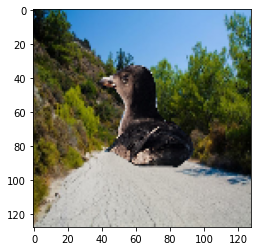

In [34]:
plt.imshow(element[0])



In [36]:
filename_list[0]

('/data/ddmg/slabs/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg',
 '/data/ddmg/slabs/segmentations/001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.png',
 '/data/ddmg/slabs/places/water/image_969.jpg',
 '1',
 '1')

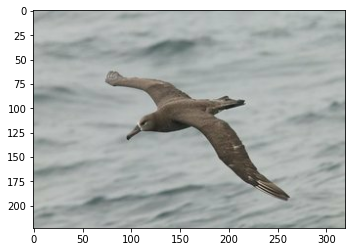

In [35]:
image_raw = tf.io.read_file(('/data/ddmg/slabs/CUB_200_2011/'
                'images/001.Black_footed_Albatross/'
                'Black_Footed_Albatross_0001_796111.jpg'))
image = tf.image.decode_image(image_raw)
plt.imshow(image)

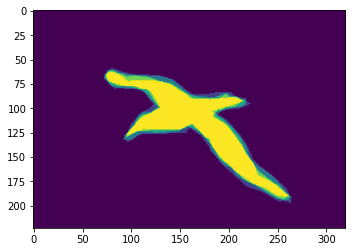

In [104]:
mask_raw = tf.io.read_file(('/data/ddmg/slabs/'
                'segmentations/001.Black_footed_Albatross/'
                'Black_Footed_Albatross_0001_796111.png'))
mask = tf.image.decode_image(mask_raw)
plt.imshow(mask)

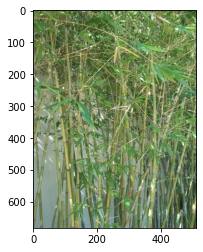

In [105]:
background_raw = tf.io.read_file(('/data/ddmg/slabs/data_large/'
                                  'b/bamboo_forest/00002162.jpg'))
background_image = tf.image.decode_image(background_raw)
plt.imshow(background_image)


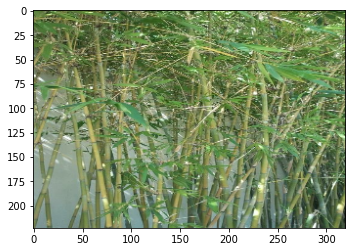

In [117]:
bkgrd_resized = tf.image.resize(background_image, (image.shape[0], image.shape[1]))
bkgrd_resized = tf.cast(bkgrd_resized, tf.uint8)
plt.imshow(bkgrd_resized)


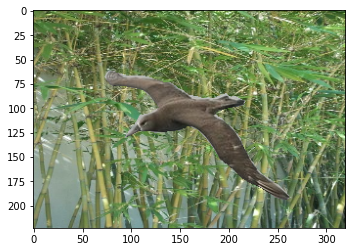

In [145]:
final = image* tf.cast(mask2, tf.uint8) + bkgrd_resized * tf.cast(1 - mask2, tf.uint8)
plt.imshow(final)

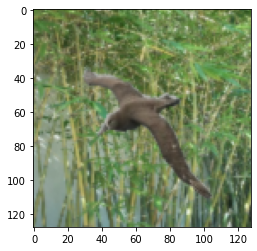

In [150]:
final_resized = tf.image.resize(final_resized, (128, 128))
final_resized = tf.cast(final_resized, tf.uint8)
plt.imshow(final_resized)

In [135]:
mask[150, 200,:]

<tf.Tensor: shape=(1,), dtype=uint8, numpy=array([255], dtype=uint8)>

In [142]:
mask2 = tf.math.round(mask/255)
mask_np = mask2.numpy()
np.unique(mask_np, return_counts=True)

(array([0., 1.], dtype=float32), array([65177,  6183]))

In [54]:

def crop_and_resize(source_img, target_img):
    """
    Make source_img exactly the same as target_img by expanding/shrinking and
    cropping appropriately.
    If source_img's dimensions are strictly greater than or equal to the
    corresponding target img dimensions, we crop left/right or top/bottom
    depending on aspect ratio, then shrink down.
    If any of source img's dimensions are smaller than target img's dimensions,
    we expand the source img and then crop accordingly
    Modified from
    https://stackoverflow.com/questions/4744372/reducing-the-width-height-of-an-image-to-fit-a-given-aspect-ratio-how-python
    """
    source_width = source_img.size[0]
    source_height = source_img.size[1]

    target_width = target_img.size[0]
    target_height = target_img.size[1]

    # Check if source does not completely cover target
    if (source_width < target_width) or (source_height < target_height):
        # Try matching width
        width_resize = (target_width, int((target_width / source_width) * source_height))
        if (width_resize[0] >= target_width) and (width_resize[1] >= target_height):
            source_resized = source_img.resize(width_resize, Image.ANTIALIAS)
        else:
            height_resize = (int((target_height / source_height) * source_width), target_height)
            assert (height_resize[0] >= target_width) and (height_resize[1] >= target_height)
            source_resized = source_img.resize(height_resize, Image.ANTIALIAS)
        # Rerun the cropping
        return crop_and_resize(source_resized, target_img)

    source_aspect = source_width / source_height
    target_aspect = target_width / target_height

    if source_aspect > target_aspect:
        # Crop left/right
        new_source_width = int(target_aspect * source_height)
        offset = (source_width - new_source_width) // 2
        resize = (offset, 0, source_width - offset, source_height)
    else:
        # Crop top/bottom
        new_source_height = int(source_width / target_aspect)
        offset = (source_height - new_source_height) // 2
        resize = (0, offset, source_width, source_height - offset)

    source_resized = source_img.crop(resize).resize((target_width, target_height), Image.ANTIALIAS)
    return source_resized
